In [1]:
# IMPORT OUR DEPENDENCIES:  

#To create our randomly-selected coordinates:
import random
import requests
import numpy as np


#To hold our data and create dataframes:
import pandas as pd


#Our API keys, and citipy (newly installed for project), to import the city weather-data.
from config import api_key
from citipy import citipy 


#And to plot our data:
import matplotlib.pyplot as plt
import matplotlib


#Last, for any formating of plots (they may be needed):
import seaborn

In [2]:
# GETTING A RANDOM SET OF COORDINATES TO USE FOR CALLING ON CITY WEATHER: 

# First we define the Latitude & Longitude Zones and use numpy to select 
#..coordinates at random, given the earth's ranges:


latitude_zone = np.arange(-90,90,15)
longitude_zone = np.arange(-180,180,15)


In [3]:
# DATAFRAME TO HOLD OUR COORDINATES:

# Create our list/Pandas DataFrame & calling it "cities" which will hold the coordinates to their city.


cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""


In [4]:
# COORDINATE SELECTION!

# First, using a coordinate systen we will assign "X" for latitude, and "Y" for long.
# For both latitude "X" & longitude "Y", we randomly select 500 unique coordinates:
# For the random samples we collect, we will assign "lats" for X and "lons" for y.
# We then will create/append the lists, "lat_samples" and "lon_samples", to use in dataframes.

for x in latitude_zone:
    for y in longitude_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,500)
        lons = random.sample(y_values,500)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))

# We then place the coordinates into our "cities" dataframe that was created above.        
cities_df = cities_df.reset_index(drop=True)



In [5]:
# USING CITIPY MODULE TO TIE COORDINATES TO A CORRESPONDING/NEARBY CITY:

cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)

C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [6]:
# CLEANING THE DATAFRAME: ELIMINATE COORDINATE-SETS THAT DON'T YIELD NEARBY CITIES:


# First we create a new data frame that eliminates coordinates that aren't near any city:
# ..Calling it "clean_cities":
filtered_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
filtered_cities_df

# Next we filter for any possible duplicates (cities that come up twice)
filtered_cities_df = filtered_cities_df.drop_duplicates()



In [7]:
# CREATING OUR SET OF CITIES WE WILL MAKE AN API CALL WITH

# Creation of our random sample set of cities from our "clean" data frame (above).
# Now we use a sample size of 500 in order to return their weather data.
# ** We will call this group of 500, "selected_cities".

selected_cities = filtered_cities_df.sample(500)

selected_cities = selected_cities.reset_index(drop=True)



In [8]:
# USING API CALLS TO GATHER WEATHER INFO ON OUR SELECTED CITIES:

# We use Openweathermap to make our API CALLS:
# Set up format for the calls:
base_url = "http://api.openweathermap.org/data/2.5/weather"

app_id = api_key

params = { "appid" :app_id,"units":"metric" }


In [9]:
# NOW enter the call data, url formatting, variables we want to collect &
# interate through for our "selected_cities" group:

def encrypt_key(input_url):
    return input_url[0:53]+"<YourKey>"+input_url[85:]

for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))

Retrieving weather information for chakwal,pk
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=chakwal%2Cpk


C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_n

Retrieving weather information for nakasongola,ug
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=nakasongola%2Cug
Retrieving weather information for barra velha,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=barra+velha%2Cbr
Retrieving weather information for mosquera,co
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mosquera%2Cco
Retrieving weather information for trat,th
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=trat%2Cth
Retrieving weather information for cay,tr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=cay%2Ctr
Retrieving weather information for mianyang,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mianyang%2Ccn
Retrieving weather information for santa catalina,co
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=santa+catalina%2Cco
Retrieving weather in

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=gympie%2Cau
Retrieving weather information for bataipora,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bataipora%2Cbr
Retrieving weather information for pangnirtung,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=pangnirtung%2Cca
Retrieving weather information for medea,dz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=medea%2Cdz
Retrieving weather information for ureki,ge
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ureki%2Cge
Retrieving weather information for rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=rikitea%2Cpf
Retrieving weather information for balestrand,no
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=balestrand%2Cno
Retrieving weather information for paytug,uz
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=coachella%2Cus
Retrieving weather information for mezen,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mezen%2Cru
Retrieving weather information for turkistan,kz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=turkistan%2Ckz
Retrieving weather information for sabaudia,it
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sabaudia%2Cit
Retrieving weather information for yaviza,pa
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=yaviza%2Cpa
Retrieving weather information for chifeng,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=chifeng%2Ccn
Retrieving weather information for bom despacho,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bom+despacho%2Cbr
Retrieving weather information for lundamo,no
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=senador+canedo%2Cbr
Retrieving weather information for inndyr,no
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=inndyr%2Cno
Retrieving weather information for san pedro de ycuamandiyu,py
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=san+pedro+de+ycuamandiyu%2Cpy
Retrieving weather information for along,in
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=along%2Cin
Retrieving weather information for samandag,tr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=samandag%2Ctr
Retrieving weather information for debre sina,et
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=debre+sina%2Cet
Retrieving weather information for lipin bor,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=lipin+bor%2Cru
Retrieving weather information for linpi

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=nabul%2Ctn
Retrieving weather information for corbelia,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=corbelia%2Cbr
Retrieving weather information for bergerac,fr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bergerac%2Cfr
Retrieving weather information for newport news,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=newport+news%2Cus
Retrieving weather information for norton shores,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=norton+shores%2Cus
Retrieving weather information for shakiso,et
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=shakiso%2Cet
Retrieving weather information for talas,kg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=talas%2Ckg
Retrieving weather information for boa esperanca do sul,br
http://a

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=acurenam%2Cgq
Retrieving weather information for corum,tr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=corum%2Ctr
Retrieving weather information for la vergne,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=la+vergne%2Cus
Retrieving weather information for kalaswala,pk
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kalaswala%2Cpk
Retrieving weather information for mineiros,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mineiros%2Cbr
Retrieving weather information for abaete,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=abaete%2Cbr
Retrieving weather information for dzhusaly,kz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=dzhusaly%2Ckz
Retrieving weather information for kaupanger,no
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=wajir%2Cke
Retrieving weather information for bayji,iq
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bayji%2Ciq
Retrieving weather information for morganton,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=morganton%2Cus
Retrieving weather information for caramay,ph
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=caramay%2Cph
Retrieving weather information for fernley,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=fernley%2Cus
Retrieving weather information for ormond beach,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ormond+beach%2Cus
Retrieving weather information for vermilion,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=vermilion%2Cus
Retrieving weather information for rapu-rapu,ph
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bloomfield%2Cus
Retrieving weather information for colon,co
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=colon%2Cco
Retrieving weather information for taloqan,af
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=taloqan%2Caf
Retrieving weather information for maceio,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=maceio%2Cbr
Retrieving weather information for puerto escondido,co
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=puerto+escondido%2Cco
Retrieving weather information for asayita,et
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=asayita%2Cet
Retrieving weather information for mikuni,jp
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mikuni%2Cjp
Retrieving weather information for iralaya,hn
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bristol%2Cus
Retrieving weather information for akhtyrskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=akhtyrskiy%2Cru
Retrieving weather information for dogondoutchi,ne
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=dogondoutchi%2Cne
Retrieving weather information for nieuw nickerie,sr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=nieuw+nickerie%2Csr
Retrieving weather information for northampton,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=northampton%2Cus
Retrieving weather information for vao,nc
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=vao%2Cnc
Retrieving weather information for nicoya,cr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=nicoya%2Ccr
Retrieving weather information for winnemucca,us
http://api

In [10]:
# POST CALL-RETREIVING:  CLEAN UP DATA (When needed) AND EXPORT OUR DATA TO CSV:
selected_cities = selected_cities.dropna()

selected_cities.shape
selected_cities.to_csv("City_Weather_data_3.csv")

In [12]:
#  PLOTTING:  FIRST WE SET OUR PROPERTIES FOR OUR SCATTER-PLOTS:

# Sert the time
#  PLOTTING:  FIRST WE SET OUR TIME PROPERTIES FOR OUR SCATTER-PLOTS:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)


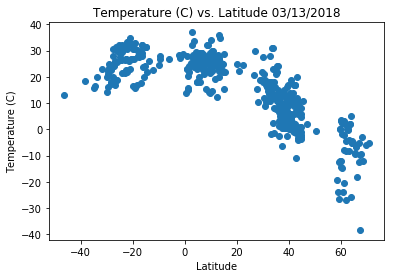

In [13]:
#  TEMPERATRUE VS LATITUDE

plt.scatter(selected_cities['Latitude'],selected_cities['Temperature'])
plt.title(f"Temperature (C) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

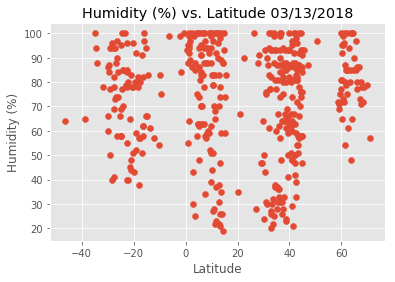

In [14]:
#  HUMIDITY VS LATITUDE

# plt.scatter(latitude,humidity)
plt.scatter(selected_cities['Latitude'], selected_cities['Humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

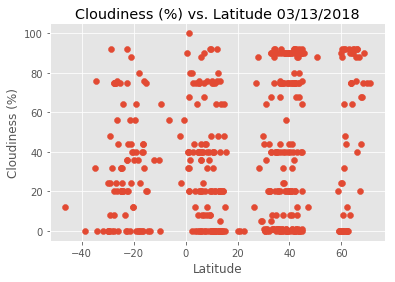

In [15]:
#  "CLOUDINESS" VS LATITUDE

# plt.scatter(latitude,cloudy)
plt.scatter(selected_cities['Latitude'], selected_cities['Cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()